# Triple lens magnification map comparing, Contour Integration and Ray Shooting
1. (done, 107MB for $2048^2$ points) Generate xs.csv, ys.csv file using python meshgrid, then
2. Read in csv file by mainmagrkk.cpp, compute the corresponding magnification for each source position, save mags to a csv file magcpp.csv, next,
3. Read magcpp.csv file using python and reshape it to an Image,
4. Compared with ray shooting method

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
# import VBBinaryLensing
import sys
sys.path.append("/Users/anything/THU/astro/softwares/aeroastro/gravlen/critical_and_caustics/pys")
from utils import *

pycodespath="/Users/anything/THU/astro/softwares/gravlens/VBBinaryLensing/examples/python_examples/"

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

In [34]:
xlim, ylim = (-2,2), (-2,2)
num = 2048
datatype = np.float32

ImgSize = (num, num)
thetax, thetay = genxy(xlim=xlim,ylim=ylim,num=num, datatype = datatype)

# np.savetxt(pycodespath+'xs.csv', thetax, delimiter = ',')
# np.savetxt(pycodespath+'ys.csv', thetay, delimiter = ',')
cmap = plt.cm.get_cmap('RdBu')#viridis, inferno, jet, RdBu, Blues

In [15]:
# # thetax.reshape(-1,1)
# # thetay.reshape(-1,1)
# # thetax.shape
# thetaxy = np.zeros((thetax.shape[0],2))
# thetaxy[:,0]=thetax
# thetaxy[:,1]=thetay
# # thetaxy = np.concatenate((thetax,thetay),axis=1)
# # thetaxy.shape
# np.savetxt(pycodespath+'xys.csv', thetaxy, delimiter = ',')

In [16]:
## generate magnification map using Bozza's method

# srcplanemag = np.zeros(thetax.shape)
# srcplaneIMG = np.zeros(ImgSize).astype(datatype)

# from tqdm import tqdm
# with tqdm(total=len(thetax)) as pbar:
#     for idx in range(len(thetax)):
#         srcplanemag[idx] = VBBL.BinaryMag2(s, q, thetax[idx], thetay[idx], rho)
# #         srcplanemag[idx] = VBBL.BinaryMag0(s, q, thetax[idx], thetay[idx]) #point source
#         pbar.update(1)
# srcplaneIMG = srcplanemag.reshape(ImgSize)

In [17]:
# cmap = plt.cm.get_cmap('RdBu')#viridis, inferno, jet, RdBu, Blues
# fig3 = plt.figure()
# fig3.set_size_inches(20,12)
# plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
# plt.margins(0,0)
# fig3img = plt.imshow(srcplaneIMG,origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# add_colorbar(fig3img)
# plt.show()

In [18]:
# magnification map using inverse ray shooting
# srcplaneIMG, imgplaneIMG, srcplaneIMG_withoutlens = twolens.get_imgs_lessmem_v2(ImgSize, xlim, ylim, num, datatype = np.float64)
from totahiti191210.two_pmnegq_inverse_ray_shoot_191210 import *

In [25]:
#   // problem case Dec. 23, 2019
#   mlens[0]=0.606132757238673;
#   mlens[1]=0.393077758724273;
#   mlens[2]= 1.0-mlens[0]-mlens[1];
#   zlens[0]=complex(-0.223224436019943, -0.000594529792111);
#   zlens[1]=complex(1.536796892880057, -0.000594529792111);
#   zlens[2]=complex(-0.365713785834210, 0.752466664870557);
#   xsCenter= -0.063260197600000;
#   ysCenter= -0.011151664000000;
#   rs= 0.000598803900000;
#   rs= 0.000628803900000;
m1 = 0.606132757238673
m2 = 0.393077758724273
m3 = 1 - m1 - m2
rho = 0.000628803900000
xs = np.array([-0.223224436019943, 1.536796892880057, -0.365713785834210])
ys = np.array([-0.000594529792111,-0.000594529792111,0.752466664870557])
raynum = 3000
masses = np.array([m1, m2, m3]) # smaller mass is at origin
trilens = Nlenses(masses, xs, ys)

In [26]:
int(rho/(xlim[1]-xlim[0])*ImgSize[0]+1)

1

In [27]:
# finite source size
# 0.01/4*2048
psfsize = int(rho/(xlim[1]-xlim[0])*ImgSize[0]+1)
psf = np.zeros((psfsize, psfsize))
for ir in range(psfsize):
    for ic in range(psfsize):
        if ir**2+ic**2<=psfsize**2:
            psf[ir,ic]=1
psf/=np.sum(psf)
from scipy import signal
# c_full = signal.convolve2d(I,Kernel,mode='full')

In [28]:
psf

array([[1.]])

In [29]:
# srcplaneIMG_rayshoot, _, _ = twolens.get_imgs_lessmem_v2(ImgSize, xlim, ylim, raynum, datatype = datatype)

In [30]:
# fig2 = plt.figure()
# fig2.set_size_inches(20,12)
# plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
# plt.margins(0,0)
# fig2img = plt.imshow(np.log10(srcplaneIMG_rayshoot),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
# add_colorbar(fig2img)
# plt.show()

In [31]:
srcplaneIMG_rayshootNomag, _, _ = trilens.get_imgs_lessmem_v3(ImgSize, xlim, ylim, raynum, datatype = datatype)

100%|██████████| 3000/3000 [01:54<00:00, 26.24it/s]


In [32]:
srcplaneIMG_rayshootNomag_psf = signal.convolve2d(srcplaneIMG_rayshootNomag,psf,mode='same')
# srcplaneIMG_rayshootNomag_psf = srcplaneIMG_rayshootNomag # point source

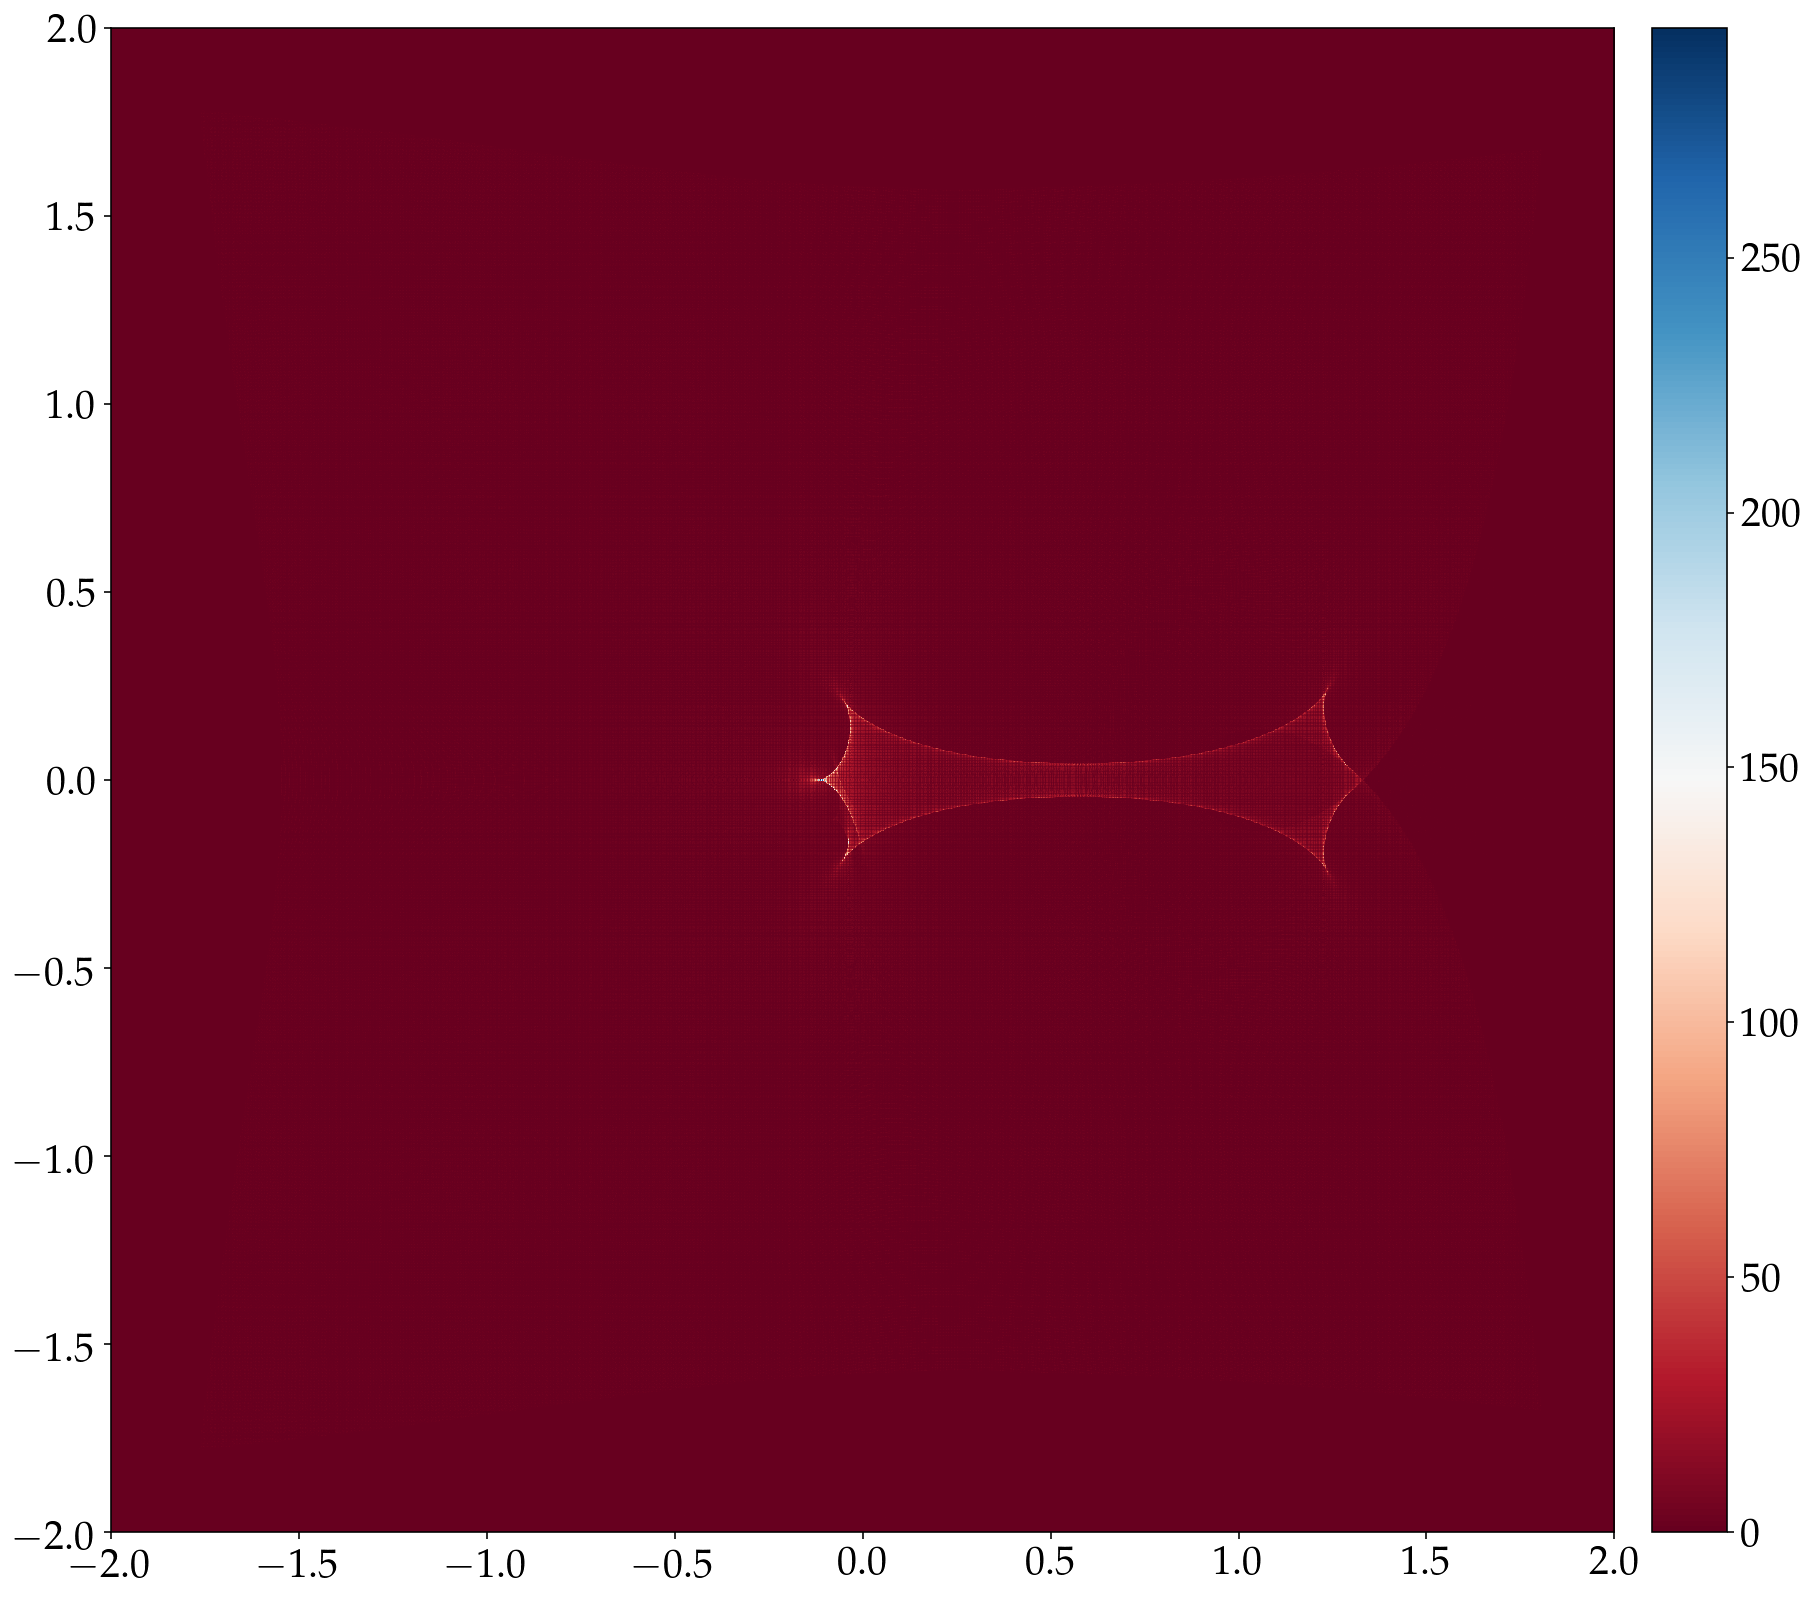

In [35]:
fig1 = plt.figure()
fig1.set_size_inches(20,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
plt.margins(0,0)
fig1img = plt.imshow((srcplaneIMG_rayshootNomag_psf),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig1img)
plt.show()

In [ ]:
# see the difference between inverse ray shooting and Bozza's method:
diffimg = srcplaneIMG_rayshootNomag_psf - srcplaneIMG

fig0 = plt.figure()
fig0.set_size_inches(20,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0, wspace = 0)
plt.margins(0,0)
fig0img = plt.imshow((diffimg),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig0img)
plt.show()

In [ ]:
# cmap = plt.cm.get_cmap('jet')#viridis, inferno
fig = plt.figure()
fig.set_size_inches(36,12)
plt.subplots_adjust(left=0.04, top = 0.92, bottom = 0.05, right=0.96, hspace = 0.2, wspace = 0.2)
plt.margins(0,0)
title_fs="Magnification map of Bozza's (left) and Ray Shooting (mid) method and their difference (right) for \n"+r"s = {:.2f}, q = {:.2f}, $\rho = ${:.3f}".format(s,q,rho)
# title_ps="Magnification map of Bozza's (left) and Ray Shooting (mid) method and their difference (right) for \n"+r"s = {:.2f}, q = {:.2f}, $\rho = ${:.3f}".format(s,q,rho)
plt.suptitle(title_fs,fontsize=40)
plt.subplot(131)
fig0img = plt.imshow((srcplaneIMG),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig0img)
plt.subplot(132)
fig0img = plt.imshow((srcplaneIMG_rayshootNomag_psf),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig0img)
plt.subplot(133)
fig0img = plt.imshow((diffimg),origin='lower',cmap=cmap, extent=[xlim[0],xlim[1],ylim[0],ylim[1]])
add_colorbar(fig0img)

plt.show()

In [ ]:
title_png="Ray{}s{:.2f}q{:.2f}rho{:.3f}.png".format(raynum,s,q,rho)
fig.savefig(title_png, format='png', bbox_inches='tight', dpi=300, pad_inches = 0)